# Доверительные интервалы для оценки среднего

In [29]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерация данны

In [4]:
blobs = datasets.make_blobs(300, centers=2, cluster_std=6, random_state=1)

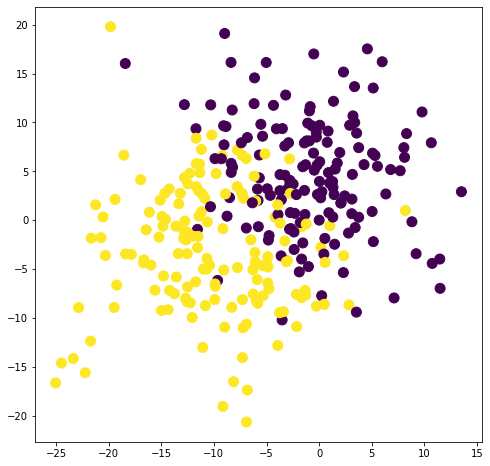

In [28]:
pylab.figure(figsize(8,8))
pylab.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1], s=100)

# Сравнение линейный моделей

## Точечная оценка

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(blobs[0], blobs[1], test_size=15, random_state=1)

In [31]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.8888888888888888

In [32]:
sgd_model = linear_model.SGDClassifier(random_state=0)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.7777777777777778

## Оценка среднего

In [33]:
sgd_auc_scores = cross_val_score(linear_model.SGDClassifier(), blobs[0], blobs[1], scoring='roc_auc', cv=20)

In [34]:
sgd_auc_scores

array([1.        , 0.89285714, 0.89285714, 0.92857143, 1.        ,
       0.98214286, 0.75      , 0.98214286, 0.91071429, 1.        ,
       0.80357143, 0.60714286, 0.91071429, 0.91071429, 0.94642857,
       0.98214286, 0.82142857, 1.        , 0.98214286, 0.96428571])

In [35]:
ridge_auc_scores = cross_val_score(linear_model.RidgeClassifier(), blobs[0], blobs[1], scoring='roc_auc', cv=20)

In [36]:
ridge_auc_scores

array([1.        , 0.89285714, 0.92857143, 0.89285714, 0.98214286,
       1.        , 0.73214286, 1.        , 0.92857143, 1.        ,
       0.85714286, 0.96428571, 0.91071429, 0.96428571, 0.98214286,
       1.        , 0.82142857, 0.98214286, 0.98214286, 0.91071429])

In [49]:
print("sgd model auc: mean {:.3}, std {:.3}".format(sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print("ridge model auc: mean {:.3}, std {:.3}". format(ridge_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

sgd model auc: mean 0.913, std 0.101
ridge model auc: mean 0.937, std 0.0713


# Интервальная оценка среднего

In [50]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [52]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

## z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [57]:
print("sgd model mean auc 95% confidence interval", _zconfint_generic(sgd_mean,
                                                                      sqrt(0.25/len(sgd_auc_scores)),
                                                                      0.05,
                                                                      "two-sided"))

sgd model mean auc 95% confidence interval (0.6942622219987118, 1.1325234922870024)


In [58]:
print("ridge model mean auc 95% confidence interval", _zconfint_generic(ridge_mean,
                                                                      sqrt(0.25/len(ridge_auc_scores)),
                                                                      0.05,
                                                                      "two-sided"))

ridge model mean auc 95% confidence interval (0.7174765077129974, 1.155737778001288)


## t-интервал

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [59]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [60]:
print("sgd model mean auc 95% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                      len(sgd_auc_scores)-1,
                                                                      0.05,
                                                                      "two-sided"))

sgd model mean auc 95% confidence interval (0.8660172256388549, 0.9607684886468594)


In [61]:
print("ridge model mean auc 95% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                      len(ridge_auc_scores)-1,
                                                                      0.05,
                                                                      "two-sided"))

ridge model mean auc 95% confidence interval (0.903235324375978, 0.9699789613383075)
